<a href="https://colab.research.google.com/github/mamuncseru/tensorflow_zero_to_mastery/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

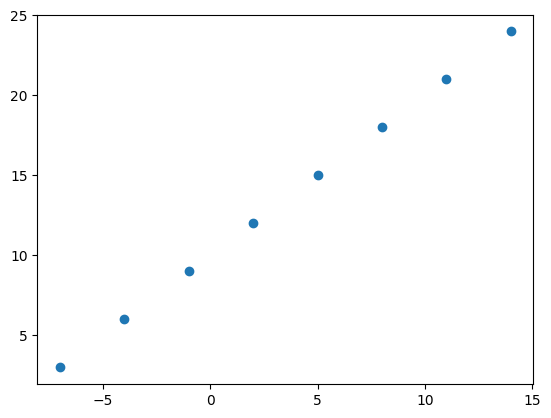

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

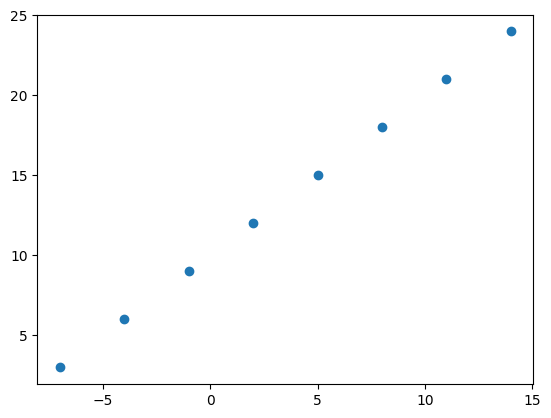

In [12]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model -letting the model try to find patterns between X & y (features and labels)

In [13]:
# set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 587ms/step - loss: 20.9942 - mae: 20.9942
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 20.6032 - mae: 20.6032
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 20.3220 - mae: 20.3220
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 20.0407 - mae: 20.0407
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 19.7595 - mae: 19.7595


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 110ms/step


array([[-21.836657]], dtype=float32)

In [16]:
y_pred + 16

array([[-5.8366566]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (also called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 8.5970 - mae: 8.5970
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 8.4645 - mae: 8.4645
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3320 - mae: 8.3320
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1995 - mae: 8.1995
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0670 - mae: 8.0670
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9345 - mae: 7.9345
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8020 - mae: 7.8020
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6695 - mae: 7.6695
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5370 - mae: 7.5370
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 

In [18]:
# Remind ourselves of the data
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved ...
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 47ms/step


array([[29.942198]], dtype=float32)

In [20]:
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 446ms/step - loss: 13.5608 - mae: 13.5608
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2291 - mae: 13.2291
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9672 - mae: 12.9672
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7151 - mae: 12.7151
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4320 - mae: 12.4320
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1084 - mae: 12.1084
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7280 - mae: 11.7280
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 11.2886 - mae: 11.2886
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7673 - mae: 10.7673
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1103 - mae: 10.1103
Epoch 11/100
1/1 [==============================] -

In [21]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 59ms/step


array([[29.677929]], dtype=float32)

In [22]:
 # 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 691ms/step - loss: 13.3247 - mae: 13.3247
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9756 - mae: 12.9756
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6304 - mae: 12.6304
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2834 - mae: 12.2834
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9503 - mae: 11.9503
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6144 - mae: 11.6144
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2701 - mae: 11.2701
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9312 - mae: 10.9312
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6781 - mae: 10.6781
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4104 - mae: 10.4104
Epoch 11/100
1/1 [==============================] - 

In [23]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 53ms/step


array([[31.597044]], dtype=float32)

In [24]:
 # 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)


Epoch 1/200
1/1 [==============================] - 1s 674ms/step - loss: 13.4511 - mae: 13.4511
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 13.1577 - mae: 13.1577
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 12.8692 - mae: 12.8692
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 12.5968 - mae: 12.5968
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 12.3266 - mae: 12.3266
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 12.0583 - mae: 12.0583
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 11.7887 - mae: 11.7887
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 11.5337 - mae: 11.5337
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 11.3341 - mae: 11.3341
Epoch 10/200
1/1 [==============================] - 0s 8ms/step - loss: 11.1282 - mae: 11.1282
Epoch 11/200
1/1 [==============================] - 0s 10

In [25]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 102ms/step


array([[26.950294]], dtype=float32)

### Evaluating a model

In practice , a typical workflow you'll go throuth when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

when it comes to evaluation... there are 3 words you shold memoriz:

> "Visualize, visualize, visualize"

it's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itselt - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [26]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [27]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

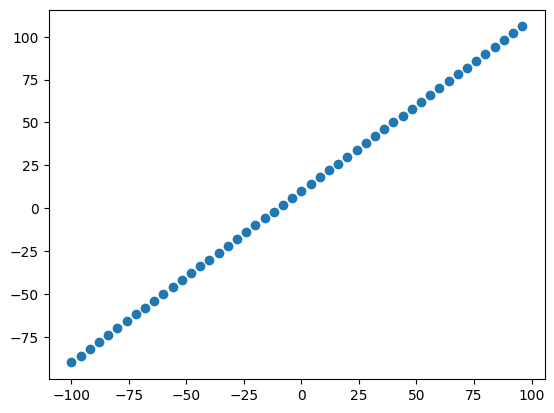

In [29]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets..

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [30]:
# Check the length of how many samples we have
len(X)

50

In [31]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

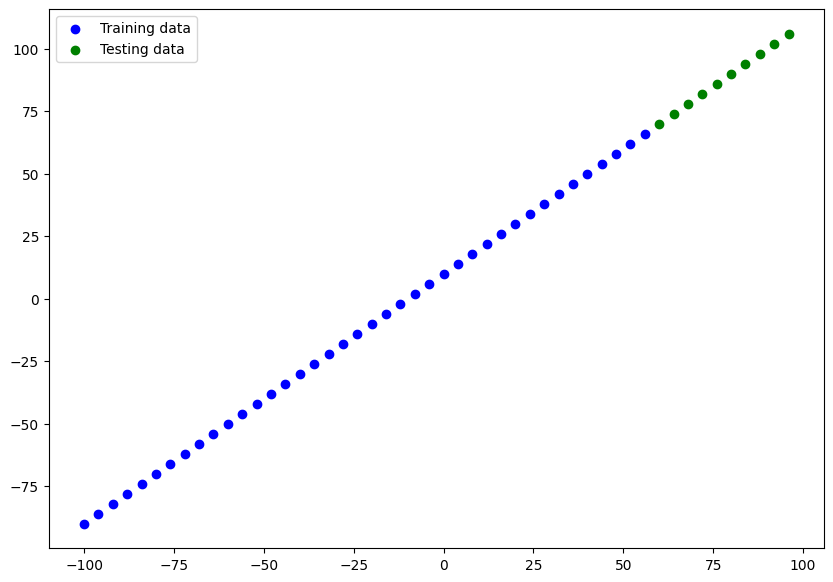

In [33]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legend
plt.legend()
plt.show()

In [34]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the modle
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualize the model

In [35]:
model.summary()

ValueError: ignored

In [37]:
X[0].shape

TensorShape([])

In [55]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model
* **Trainable params** - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training (this is a typical when you bring in already learnt parameters from other models during **transfer learning**

In [57]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [58]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


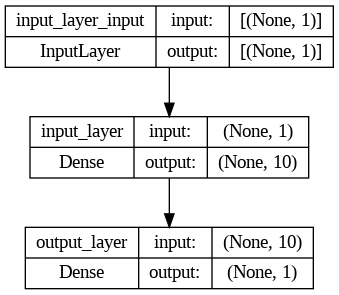

In [59]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

TO visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in a form of `y_test` or `y_true` (ground truth versus our model's prediction)

In [60]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 92ms/step


array([[ 77.00713 ],
       [ 82.02734 ],
       [ 87.04756 ],
       [ 92.06777 ],
       [ 97.087975],
       [102.10819 ],
       [107.1284  ],
       [112.14859 ],
       [117.168816],
       [122.18903 ]], dtype=float32)

In [61]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

** Note ** : if you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [62]:
# Let's create a potting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    
    """
    Plots training data, test data and compares predictions to ground truth label
    """
    plt.figure(figsize=(10, 7))
    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label='Training data')
    #plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model's preductions in red
    plt.scatter(test_data, predictions, c='r', label='predictions')
    #Show the legend
    plt.legend();


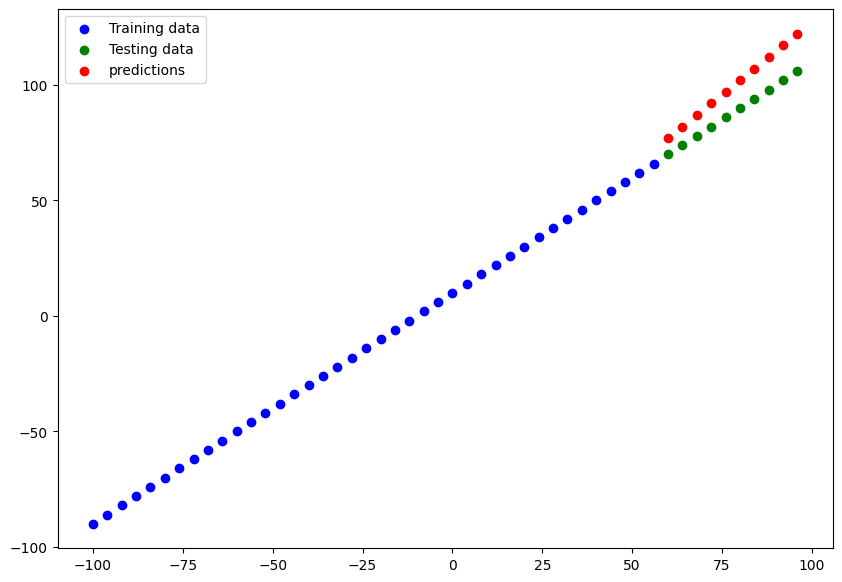

In [63]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my models predictions"
* MSE - mean squared error, "average the squared errors"

In [64]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 218ms/step - loss: 11.5981 - mae: 11.5981


[11.5980806350708, 11.5980806350708]

In [71]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.598082>

In [72]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=11.598082>

In [65]:
y_pred

array([[ 77.00713 ],
       [ 82.02734 ],
       [ 87.04756 ],
       [ 92.06777 ],
       [ 97.087975],
       [102.10819 ],
       [107.1284  ],
       [112.14859 ],
       [117.168816],
       [122.18903 ]], dtype=float32)

In [66]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [73]:
# Calculate the mean squared error
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=143.10234>

In [74]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=143.10234>

In [75]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn pattern or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `mode_1`**

In [81]:
X_train.shape, y_train.shape

(TensorShape([40]), TensorShape([40]))

In [82]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 20ms/step - loss: 56.8719 - mae: 56.8719
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 22.5005 - mae: 22.5005
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 10.7727 - mae: 10.7727
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2322 - mae: 11.2322
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 12.4545 - mae: 12.4545
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6358 - mae: 9.6358
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7440 - mae: 8.7440
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0711 - mae: 9.0711
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.1621 - mae: 19.1621
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3517 - mae: 10.3517
Epoch 11/100
2/2 [==============================] - 0s 9ms/s

1/1 [==============================] - 0s 47ms/step


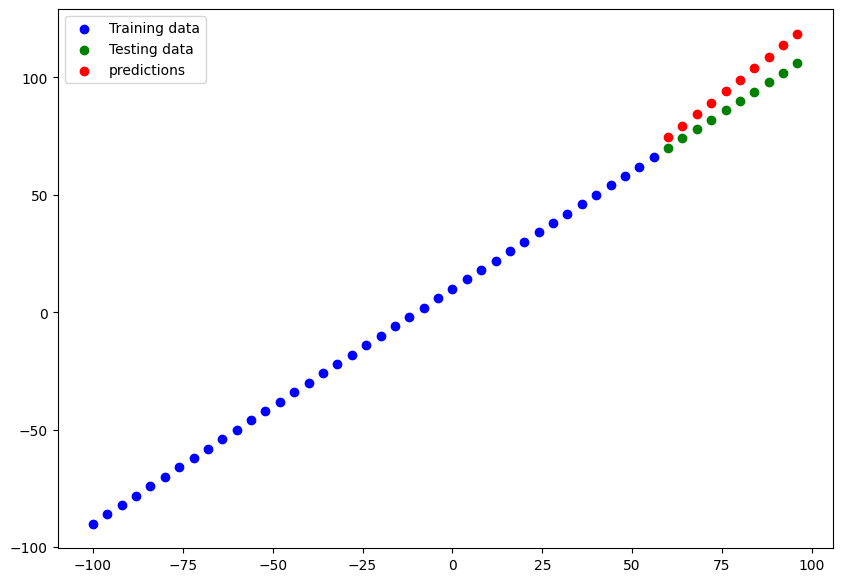

In [83]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)